In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/건강검진/health_checkup/JDM/건강검진.csv")

In [5]:
import pandas as pd
import os

# 데이터 불러오기
df = pd.read_csv("C:/건강검진/health_checkup/JDM/건강검진.csv")

# 저장할 폴더 경로
output_dir = "C:/건강검진/health_checkup/JDM/연도별_건강검진"
os.makedirs(output_dir, exist_ok=True)

# 'YEAR' 컬럼 기준으로 연도별 데이터 분리 및 저장
for year in df["YEAR"].unique():
    df_year = df[df["YEAR"] == year]
    file_path = os.path.join(output_dir, f"건강검진_{year}.csv")
    df_year.to_csv(file_path, index=False)
    print(f"{year}년 데이터 저장 완료: {file_path}")


2017년 데이터 저장 완료: C:/건강검진/health_checkup/JDM/연도별_건강검진\건강검진_2017.csv
2018년 데이터 저장 완료: C:/건강검진/health_checkup/JDM/연도별_건강검진\건강검진_2018.csv
2019년 데이터 저장 완료: C:/건강검진/health_checkup/JDM/연도별_건강검진\건강검진_2019.csv
2020년 데이터 저장 완료: C:/건강검진/health_checkup/JDM/연도별_건강검진\건강검진_2020.csv
2021년 데이터 저장 완료: C:/건강검진/health_checkup/JDM/연도별_건강검진\건강검진_2021.csv
2022년 데이터 저장 완료: C:/건강검진/health_checkup/JDM/연도별_건강검진\건강검진_2022.csv


In [31]:
df = pd.read_csv("C:/데이터 폴더/연도별_건강검진\건강검진_2017.csv")

EDA

In [19]:
df

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,...,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017,1,1,8,43,170,75,90.0,120,80,...,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017,2,1,7,11,180,80,89.0,130,82,...,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017,3,1,9,41,165,75,91.0,120,70,...,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017,4,1,11,48,175,80,91.0,145,87,...,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017,5,1,11,30,165,60,80.0,138,82,...,1,0,22.0,normal,False,pre,pre,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991613,2017,999996,1,10,48,175,80,92.1,114,80,...,1,0,26.1,class1,False,normal,pre,False,False,False
991614,2017,999997,1,8,41,170,75,86.0,119,83,...,1,0,26.0,class1,False,normal,pre,False,False,False
991615,2017,999998,2,9,26,155,50,68.0,110,70,...,3,1,20.8,normal,False,normal,normal,False,False,False
991616,2017,999999,1,6,29,175,60,72.0,119,74,...,1,0,19.6,normal,True,normal,normal,False,False,False


In [32]:
df["Year_ID"] = df["YEAR"].astype(str) + "_" + df["ID"].astype(str)
cols = ['Year_ID'] + [col for col in df.columns if col != 'Year_ID']
df = df[cols]
df = df.drop(['ID', 'YEAR'], axis=1)

In [41]:
df.shape

(991618, 30)

In [42]:
df.head()

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,...,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,170,75,90.0,120,80,99,...,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017_2,1,7,11,180,80,89.0,130,82,106,...,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017_3,1,9,41,165,75,91.0,120,70,98,...,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017_4,1,11,48,175,80,91.0,145,87,95,...,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017_5,1,11,30,165,60,80.0,138,82,101,...,1,0,22.0,normal,False,pre,pre,False,False,False


In [43]:
df.tail()

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,...,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
991613,2017_999996,1,10,48,175,80,92.1,114,80,88,...,1,0,26.1,class1,False,normal,pre,False,False,False
991614,2017_999997,1,8,41,170,75,86.0,119,83,83,...,1,0,26.0,class1,False,normal,pre,False,False,False
991615,2017_999998,2,9,26,155,50,68.0,110,70,90,...,3,1,20.8,normal,False,normal,normal,False,False,False
991616,2017_999999,1,6,29,175,60,72.0,119,74,69,...,1,0,19.6,normal,True,normal,normal,False,False,False
991617,2017_1000000,1,11,41,160,70,90.5,133,79,99,...,3,1,27.3,class1,True,normal,pre,True,False,False


In [44]:
df.describe()

,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,...,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI
count,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,...,991618.000000,991618.000000,991618.00000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000,991618.000000
mean,1.469012,10.523144,33.689868,162.239905,63.283185,81.233228,122.430339,76.051462,100.424266,195.555733,...,113.037357,14.229735,1.09423,0.860468,25.989131,25.754597,37.136020,1.608079,0.499773,23.915436
std,0.499039,2.836311,12.675143,9.283238,12.514504,11.850005,14.550655,9.893186,24.179049,38.659897,...,35.842033,1.585018,0.43773,0.480479,23.491025,26.306570,50.427837,0.818493,0.500000,3.517371
min,1.000000,5.000000,11.000000,130.000000,25.000000,8.000000,0.000000,0.000000,0.000000,30.000000,...,1.000000,1.000000,1.00000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,12.500000
25%,1.000000,8.000000,27.000000,155.000000,55.000000,74.100000,112.000000,70.000000,88.000000,169.000000,...,89.000000,13.200000,1.00000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,21.500000
50%,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,120.000000,76.000000,96.000000,193.000000,...,111.000000,14.300000,1.00000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,23.900000
75%,2.000000,13.000000,43.000000,170.000000,70.000000,87.800000,131.000000,82.000000,105.000000,219.000000,...,135.000000,15.400000,1.00000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,26.000000
max,2.000000,18.000000,50.000000,190.000000,140.000000,999.000000,273.000000,185.000000,852.000000,2344.000000,...,5119.000000,25.000000,6.00000,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000,45.700000


결측치 확인

In [45]:
df.isnull().sum()

Year_ID             0
SEX                 0
AGE_GROUP           0
SIDO                0
HEIGHT              0
WEIGHT              0
WAIST               0
BP_HIGH             0
BP_LWST             0
BLDS                0
TOT_CHOLE           0
TRIGLYCERIDE        0
HDL_CHOLE           0
LDL_CHOLE           0
HMG                 0
OLIG_PROTE_CD       0
CREATININE          0
SGOT_AST            0
SGPT_ALT            0
GAMMA_GTP           0
SMK_STAT_TYPE_CD    0
DRK_YN              0
BMI                 0
OBESITY             0
DYSLIPIDEMIA        0
DIABETES            0
HYPERTENSION        0
LIVER_ABNORMAL      0
KIDNEY_ABNORMAL     0
ANEMIA              0
dtype: int64

이상치 확인

In [33]:
# 이상치 확인 함수 (IQR 방법 사용)
def find_outliers_iqr(df):
    outliers = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # 각 컬럼에 대해 Q1, Q3 계산
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # 이상치 범위 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 이상치가 있는 인덱스를 추출
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    
    return outliers

# 이상치가 있는 컬럼 확인
outliers = find_outliers_iqr(df)
print("각 컬럼별 이상치 개수:")
for column, count in outliers.items():
    print(f"{column}: {count} 개의 이상치")

각 컬럼별 이상치 개수:
SEX: 0 개의 이상치
AGE_GROUP: 0 개의 이상치
SIDO: 0 개의 이상치
HEIGHT: 87 개의 이상치
WEIGHT: 19227 개의 이상치
WAIST: 4419 개의 이상치
BP_HIGH: 15856 개의 이상치
BP_LWST: 13139 개의 이상치
BLDS: 64223 개의 이상치
TOT_CHOLE: 11299 개의 이상치
TRIGLYCERIDE: 54116 개의 이상치
HDL_CHOLE: 13862 개의 이상치
LDL_CHOLE: 10099 개의 이상치
HMG: 9766 개의 이상치
OLIG_PROTE_CD: 56189 개의 이상치
CREATININE: 8009 개의 이상치
SGOT_AST: 67635 개의 이상치
SGPT_ALT: 72947 개의 이상치
GAMMA_GTP: 94167 개의 이상치
SMK_STAT_TYPE_CD: 0 개의 이상치
DRK_YN: 0 개의 이상치
BMI: 17247 개의 이상치


In [48]:
# 이상치 비율 계산 함수 (IQR 방법)
def calculate_outlier_percentage(df):
    outlier_percentage = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # IQR 계산
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 이상치 비율 계산
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage[column] = len(outliers) / len(df) * 100
    
    return outlier_percentage

# 이상치 비율 계산
outlier_percentage = calculate_outlier_percentage(df)

# 각 컬럼별 이상치 비율 출력
print("각 컬럼별 이상치 비율 (%):")
for column, percentage in outlier_percentage.items():
    print(f"{column}: {percentage:.2f}%")

각 컬럼별 이상치 비율 (%):
SEX: 0.00%
AGE_GROUP: 0.00%
SIDO: 0.00%
HEIGHT: 0.01%
WEIGHT: 1.94%
WAIST: 0.45%
BP_HIGH: 1.60%
BP_LWST: 1.33%
BLDS: 6.48%
TOT_CHOLE: 1.14%
TRIGLYCERIDE: 5.46%
HDL_CHOLE: 1.40%
LDL_CHOLE: 1.02%
HMG: 0.98%
OLIG_PROTE_CD: 5.67%
CREATININE: 0.81%
SGOT_AST: 6.82%
SGPT_ALT: 7.36%
GAMMA_GTP: 9.50%
SMK_STAT_TYPE_CD: 0.00%
DRK_YN: 0.00%
BMI: 1.74%


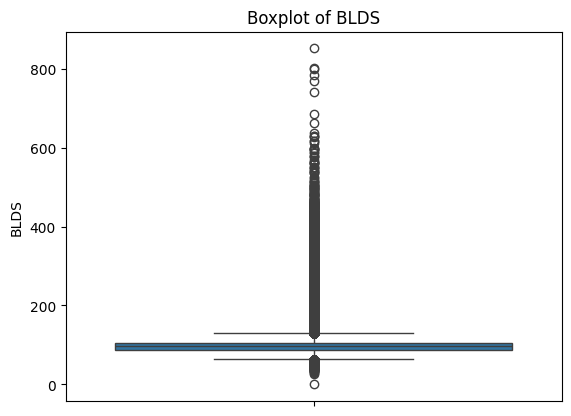

In [34]:
#공복혈당
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["BLDS"])  # y축에 수치형 컬럼
plt.title("Boxplot of BLDS")
plt.ylabel("BLDS")
plt.show()

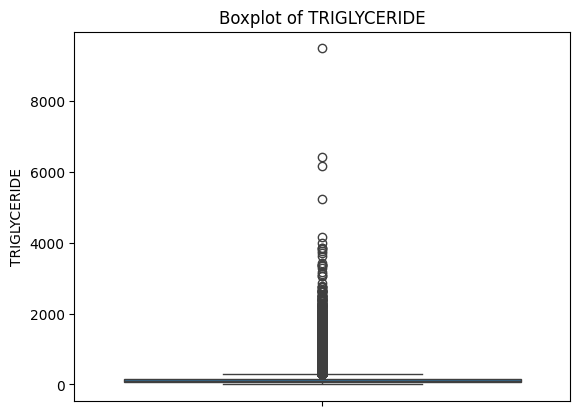

In [57]:
#중성지방
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["TRIGLYCERIDE"])  # y축에 수치형 컬럼
plt.title("Boxplot of TRIGLYCERIDE")
plt.ylabel("TRIGLYCERIDE")
plt.show()

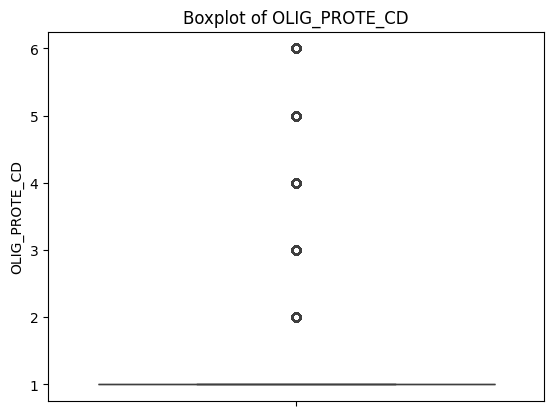

In [58]:
#요단백
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["OLIG_PROTE_CD"])  # y축에 수치형 컬럼
plt.title("Boxplot of OLIG_PROTE_CD")
plt.ylabel("OLIG_PROTE_CD")
plt.show()

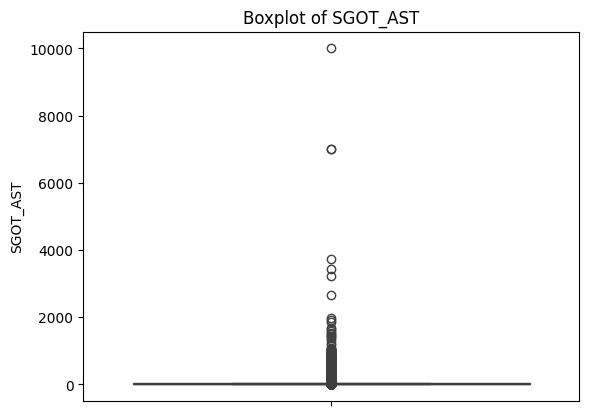

In [ ]:
#혈청지오티 AST
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["SGOT_AST"])  # y축에 수치형 컬럼
plt.title("Boxplot of SGOT_AST")
plt.ylabel("SGOT_AST")
plt.show()

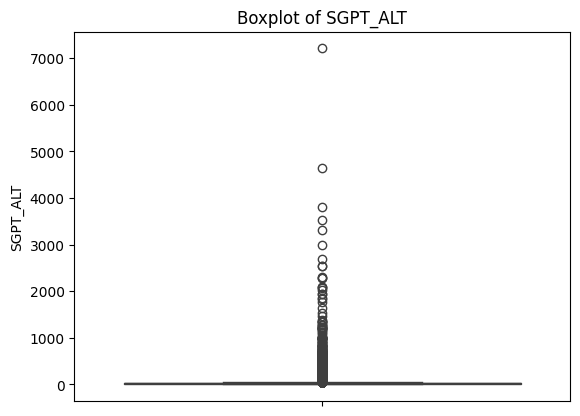

In [60]:
#혈청지오티 ALT
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["SGPT_ALT"])  # y축에 수치형 컬럼
plt.title("Boxplot of SGPT_ALT")
plt.ylabel("SGPT_ALT")
plt.show()

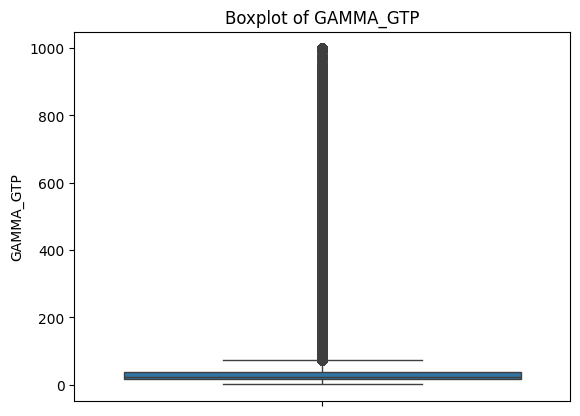

In [61]:
#감마지티피
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["GAMMA_GTP"])  # y축에 수치형 컬럼
plt.title("Boxplot of GAMMA_GTP")
plt.ylabel("GAMMA_GTP")
plt.show()

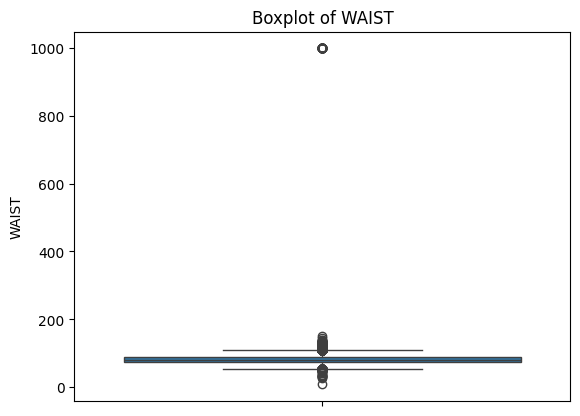

In [72]:
#WAIST(50~120) max 값 999존재
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["WAIST"])  # y축에 수치형 컬럼
plt.title("Boxplot of WAIST")
plt.ylabel("WAIST")
plt.show()

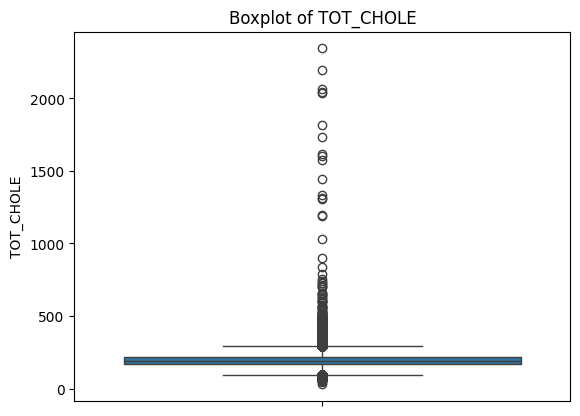

In [ ]:
#총 콜레스테롤(100~300), max 값 2635 존재
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["TOT_CHOLE"])  # y축에 수치형 컬럼
plt.title("Boxplot of TOT_CHOLE")
plt.ylabel("TOT_CHOLE")
plt.show()

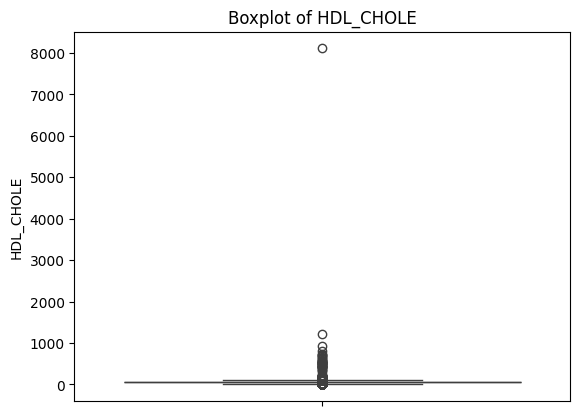

In [ ]:
#좋은은 콜레스테롤(40~100), max 값 8110 존재
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["HDL_CHOLE"])  # y축에 수치형 컬럼
plt.title("Boxplot of HDL_CHOLE")
plt.ylabel("HDL_CHOLE")
plt.show()

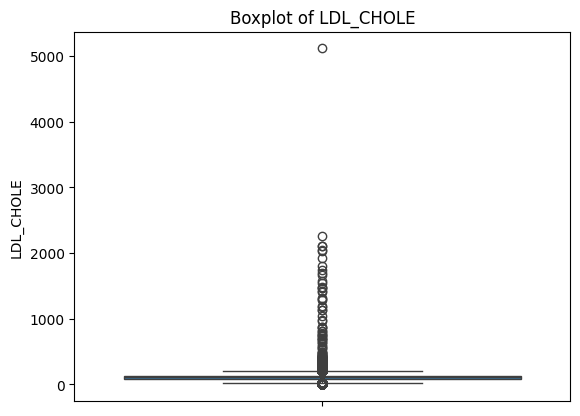

In [ ]:
#LDL_CHOLE(70~160), max 값 5119 존재
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["LDL_CHOLE"])  # y축에 수치형 컬럼
plt.title("Boxplot of LDL_CHOLE")
plt.ylabel("LDL_CHOLE")
plt.show()

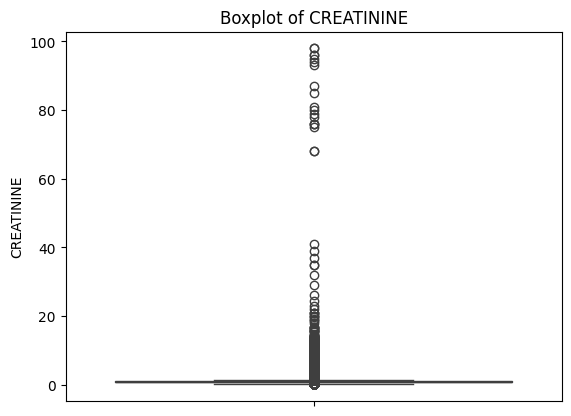

In [ ]:
#CREATININE(0.5~1.5), max 값 98 존재
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["CREATININE"])  # y축에 수치형 컬럼
plt.title("Boxplot of CREATININE")
plt.ylabel("CREATININE")
plt.show()

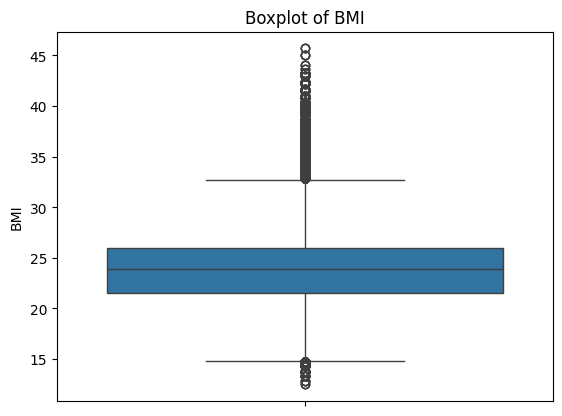

In [69]:
#BMI(15~35), max 값 56.2 존재
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치를 시각화
sns.boxplot(y=df["BMI"])  # y축에 수치형 컬럼
plt.title("Boxplot of BMI")
plt.ylabel("BMI")
plt.show()

정규분포 확인

In [35]:
input_features=["SEX","SIDO","AGE_GROUP","HEIGHT", "WEIGHT", "WAIST","BP_HIGH", "BP_LWST", 
                  "BLDS","TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", 
                  "LDL_CHOLE", "HMG", "OLIG_PROTE_CD",
                  "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP", 
                  "SMK_STAT_TYPE_CD", "DRK_YN", "BMI"]
from scipy.stats import shapiro

for column in input_features:
    stat, p_value = shapiro(df[column])
    if p_value > 0.05:
        print(f"{column}은 정규분포를 따릅니다.")
    else:
        print(f"{column}은 정규분포를 따르지 않습니다.")


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 991618.
  res = hypotest_fun_out(*samples, **kwds)


SEX은 정규분포를 따르지 않습니다.
SIDO은 정규분포를 따르지 않습니다.
AGE_GROUP은 정규분포를 따르지 않습니다.
HEIGHT은 정규분포를 따르지 않습니다.
WEIGHT은 정규분포를 따르지 않습니다.
WAIST은 정규분포를 따르지 않습니다.
BP_HIGH은 정규분포를 따르지 않습니다.
BP_LWST은 정규분포를 따르지 않습니다.
BLDS은 정규분포를 따르지 않습니다.
TOT_CHOLE은 정규분포를 따르지 않습니다.
TRIGLYCERIDE은 정규분포를 따르지 않습니다.
HDL_CHOLE은 정규분포를 따르지 않습니다.
LDL_CHOLE은 정규분포를 따르지 않습니다.
HMG은 정규분포를 따르지 않습니다.
OLIG_PROTE_CD은 정규분포를 따르지 않습니다.
CREATININE은 정규분포를 따르지 않습니다.
SGOT_AST은 정규분포를 따르지 않습니다.
SGPT_ALT은 정규분포를 따르지 않습니다.
GAMMA_GTP은 정규분포를 따르지 않습니다.
SMK_STAT_TYPE_CD은 정규분포를 따르지 않습니다.
DRK_YN은 정규분포를 따르지 않습니다.
BMI은 정규분포를 따르지 않습니다.


타겟변수 class별 분포

C:\Users\user\AppData\Local\Temp\ipykernel_12000\838098277.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Spectral", ax=axes[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12000\838098277.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Spectral", ax=axes[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12000\838098277.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Spectral", ax=axes[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12000\838098277.py

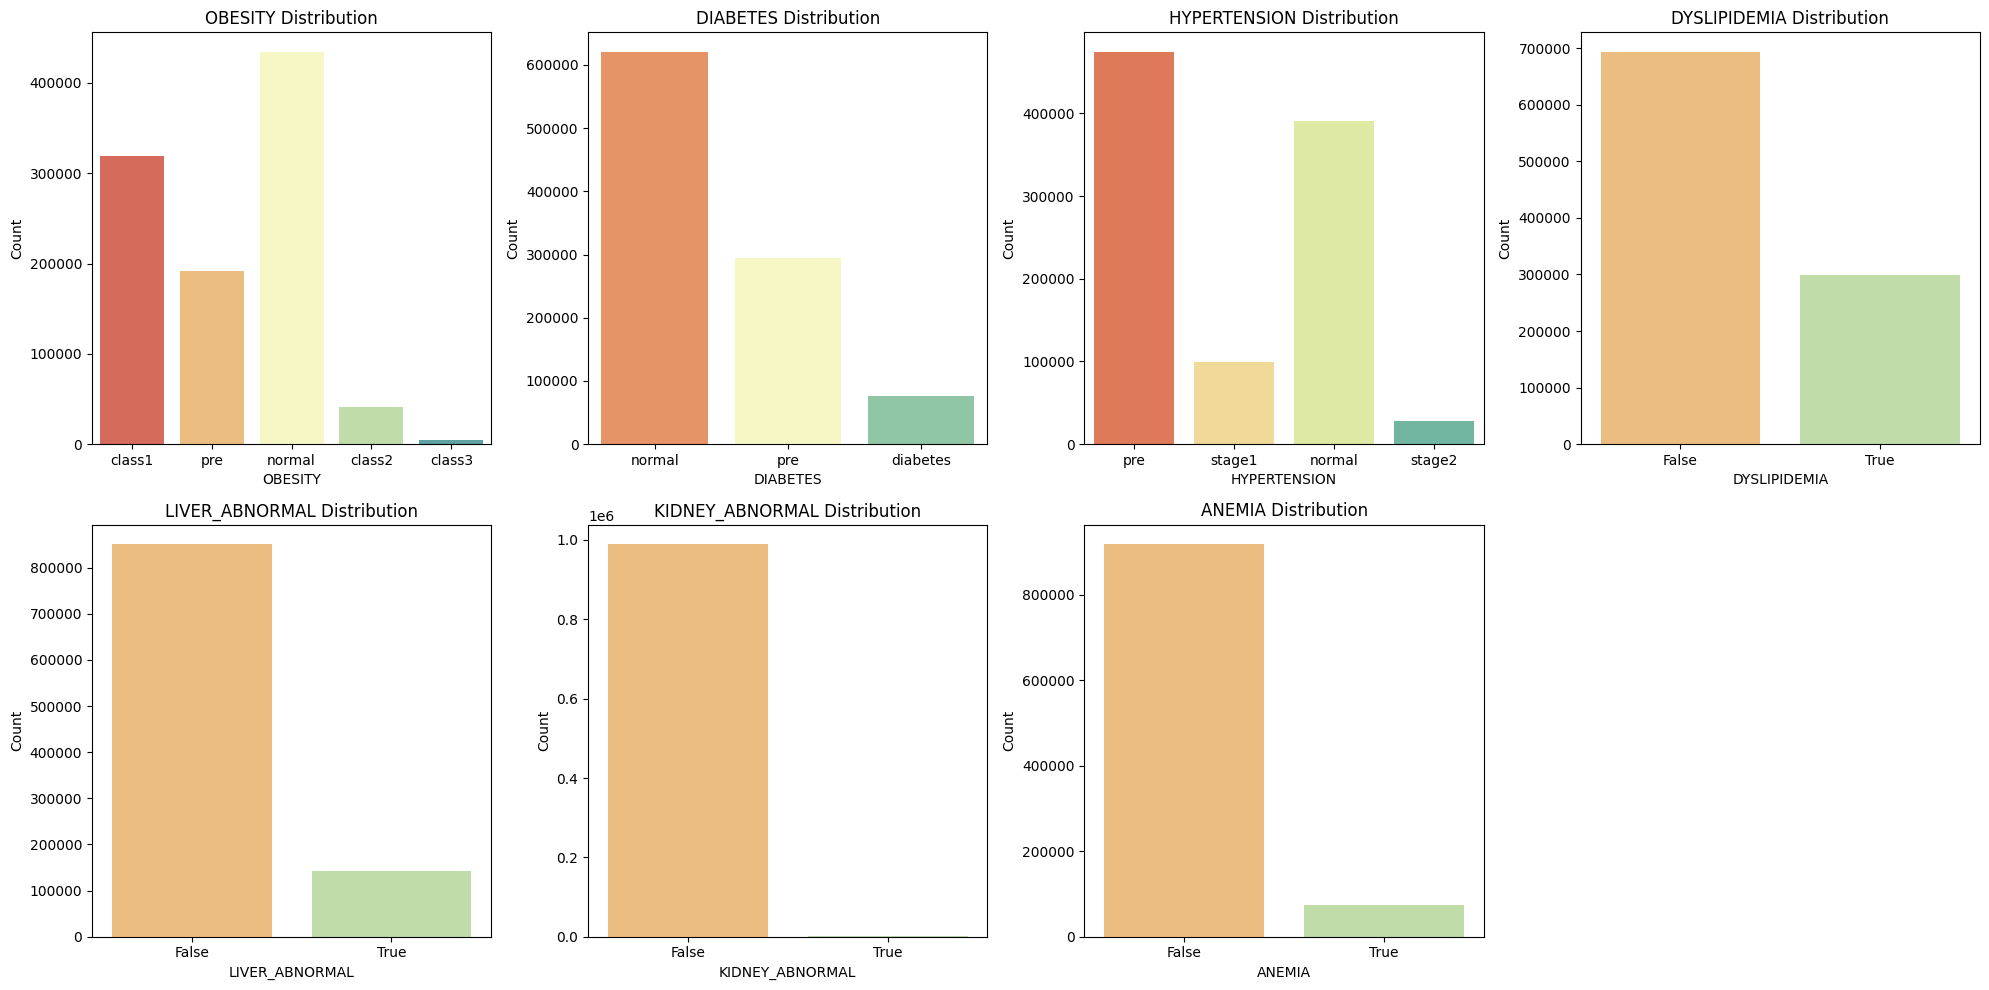

In [36]:
# 시각화할 변수 리스트
targets = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'DYSLIPIDEMIA', 
               'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']

# 서브플롯 설정 (2행 4열: 8개의 칸 중 7개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2차원 배열 -> 1차원으로 평탄화

# 각 변수에 대해 countplot 그리기
for i, var in enumerate(targets):
    sns.countplot(x=var, data=df, palette="Spectral", ax=axes[i])
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# 사용하지 않는 마지막 subplot 숨기기 (예: 8번째 subplot)
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


독립변수 상관관계

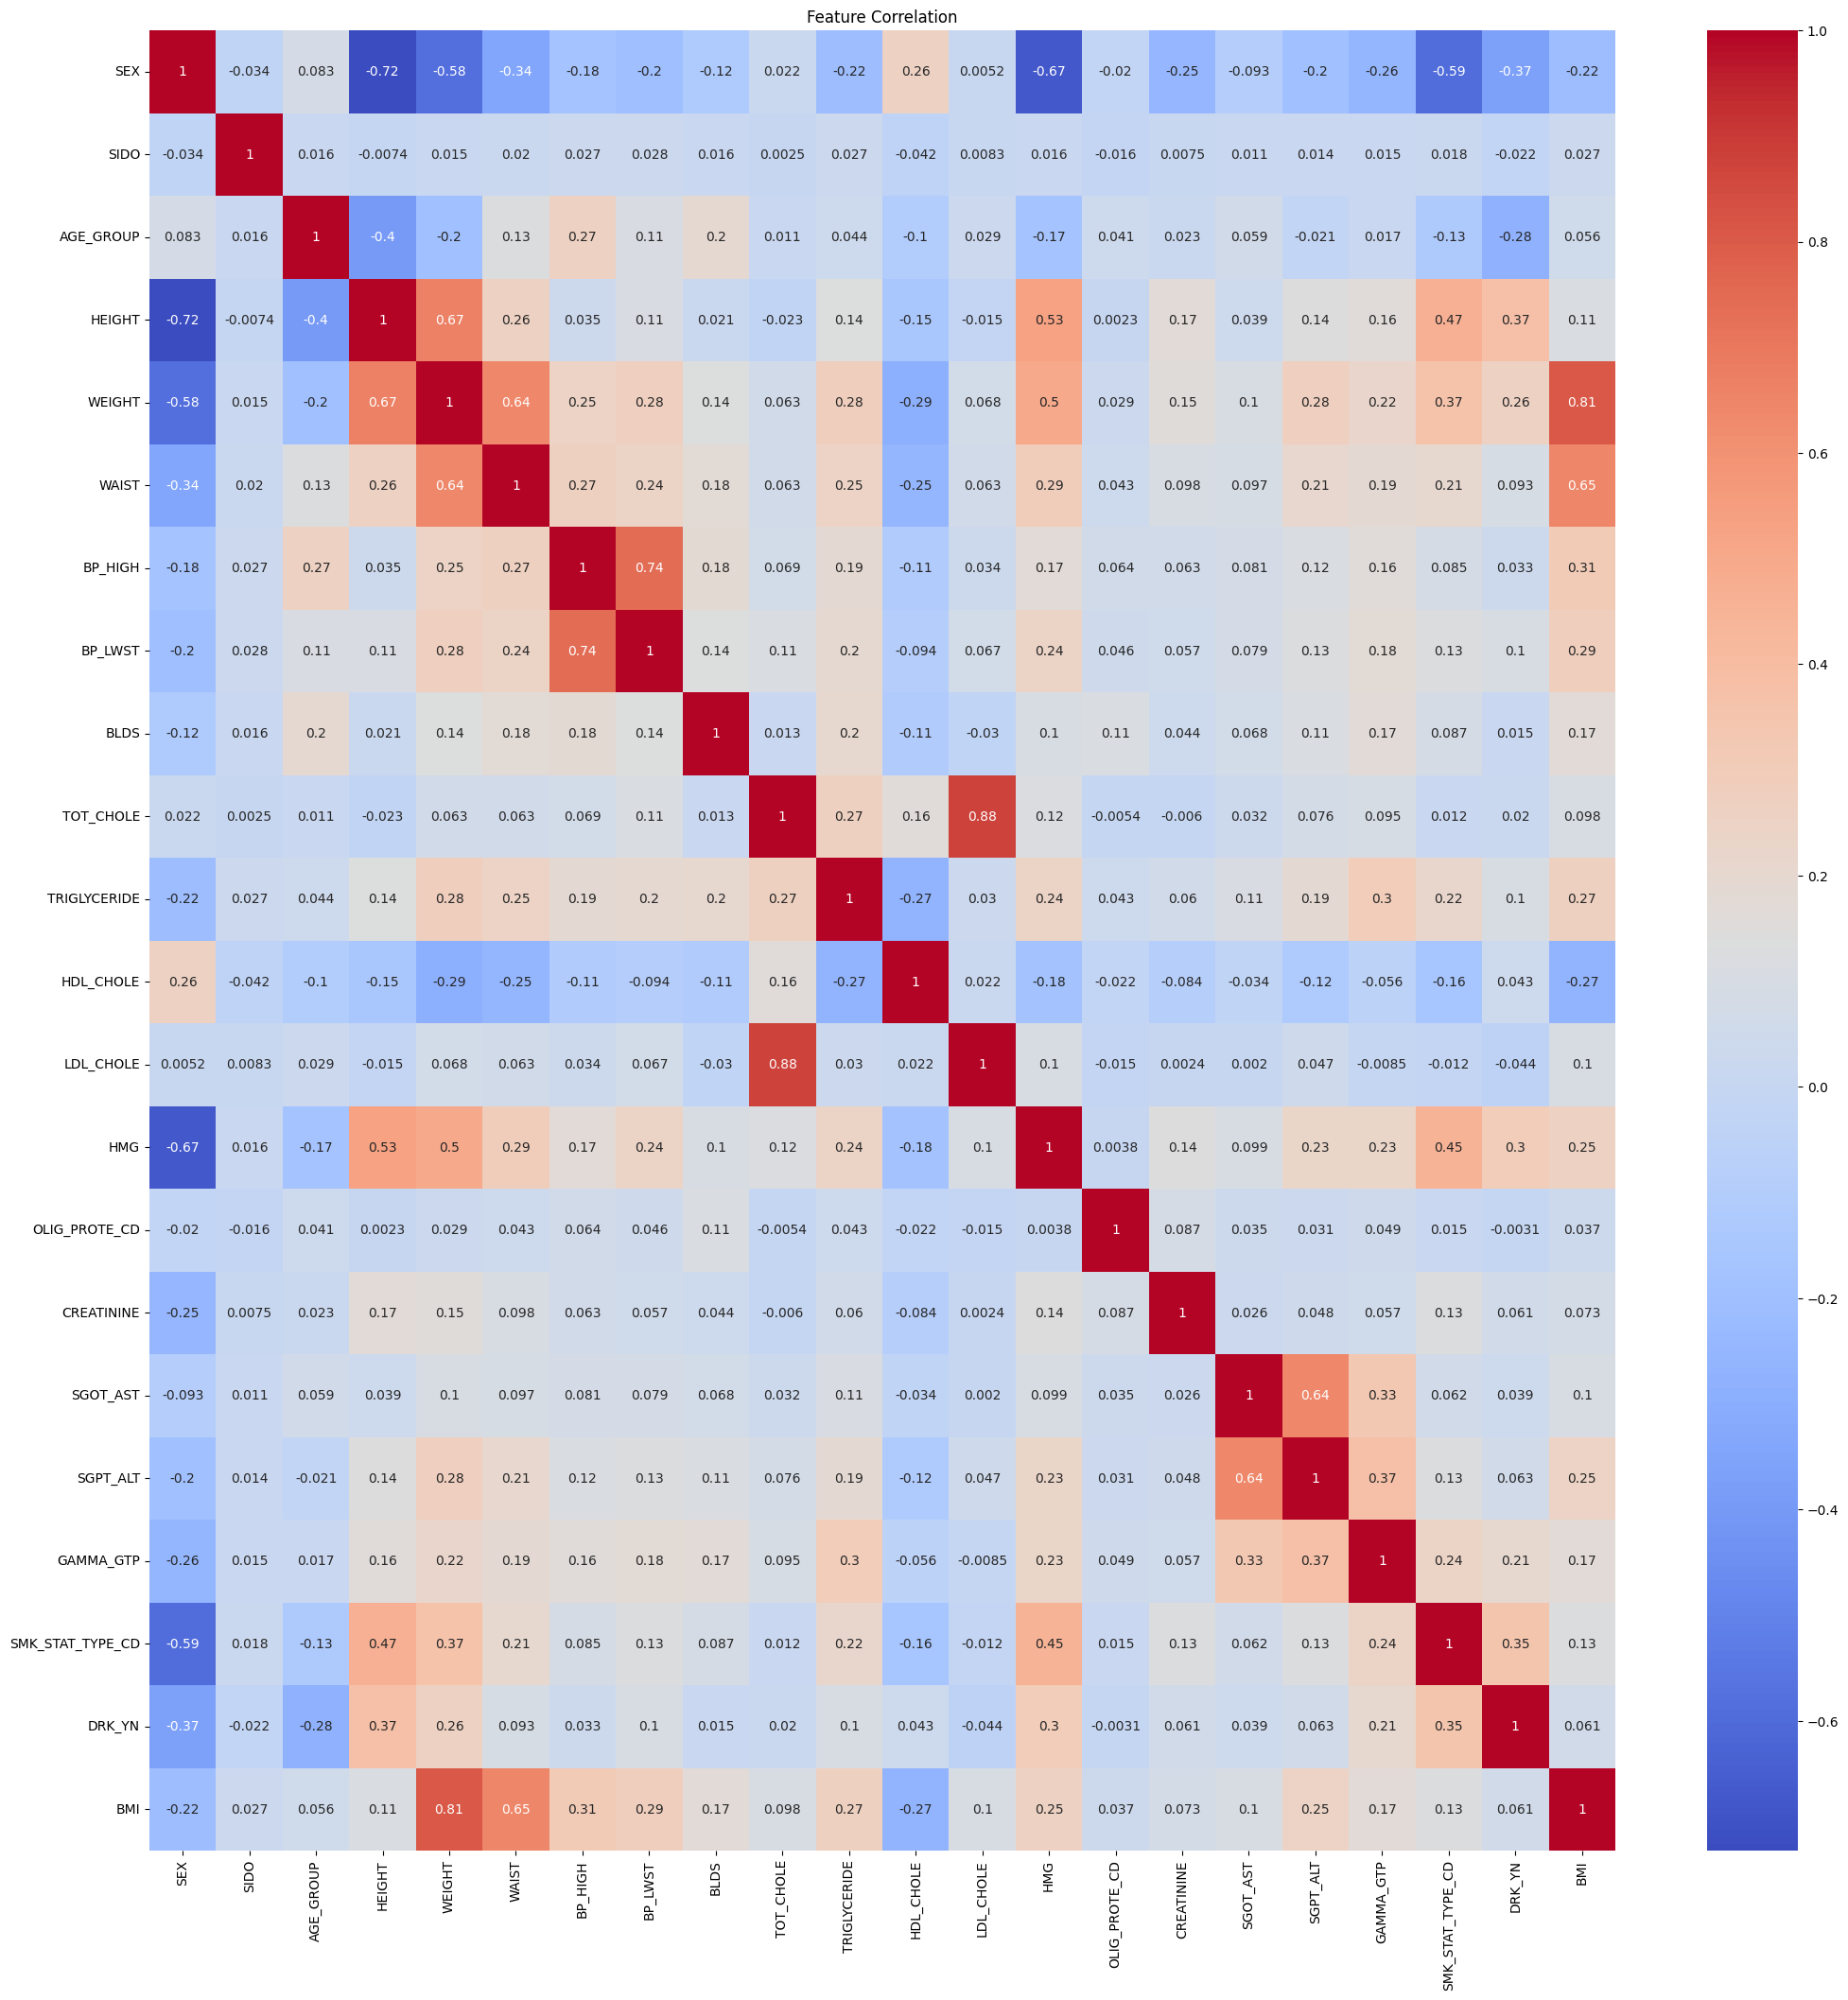

In [ ]:
#상관관계 분석
corr = df[input_features].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [37]:
# 맵핑 적용

# OBESITY
obesity_map = {'normal': 0, 'pre': 1, 'class1': 2, 'class2': 3, 'class3': 4}
df['OBESITY'] = df['OBESITY'].map(obesity_map)

# DIABETES
diabetes_map = {'normal': 0, 'pre': 1, 'diabetes': 2}
df['DIABETES'] = df['DIABETES'].map(diabetes_map)

# HYPERTENSION
hypertension_map = {'normal': 0, 'pre': 1, 'stage1': 2, 'stage2': 3}
df['HYPERTENSION'] = df['HYPERTENSION'].map(hypertension_map)

# 이진 변수들 (True/False)
binary_cols = ['DYSLIPIDEMIA', 'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']
for col in binary_cols:
    df[col] = df[col].map({False: 0, True: 1})



독립변수 & 타겟 변수 간 상관관계

Corr - OBESITY


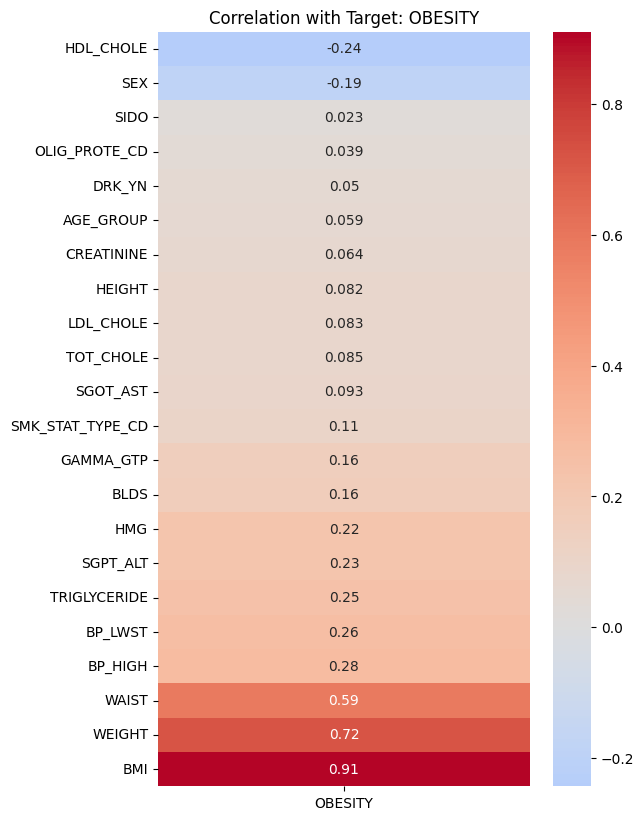

Corr - DIABETES


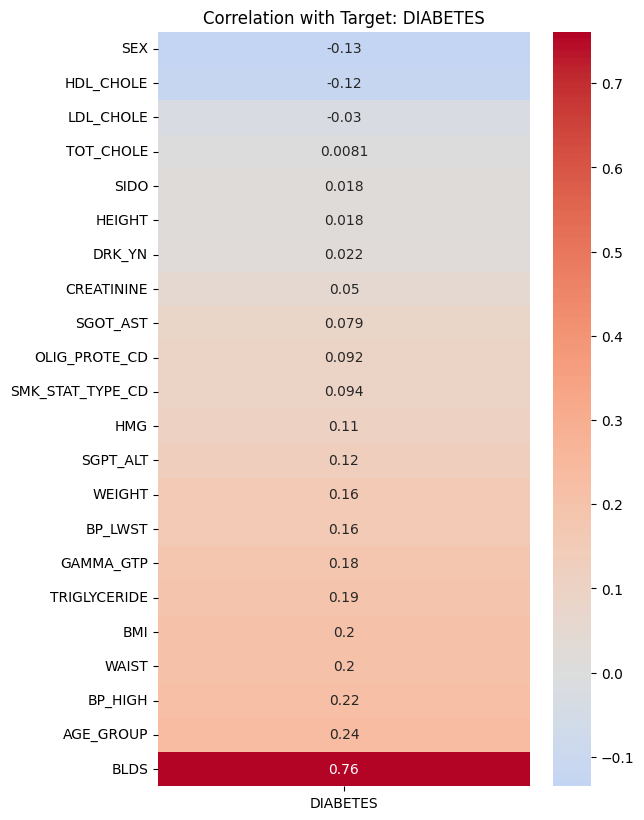

Corr - HYPERTENSION


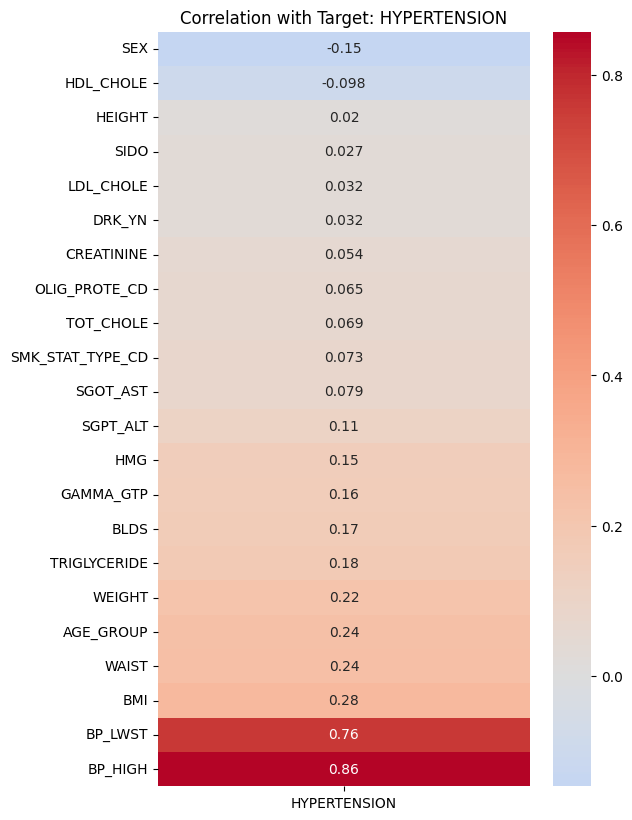

Corr - DYSLIPIDEMIA


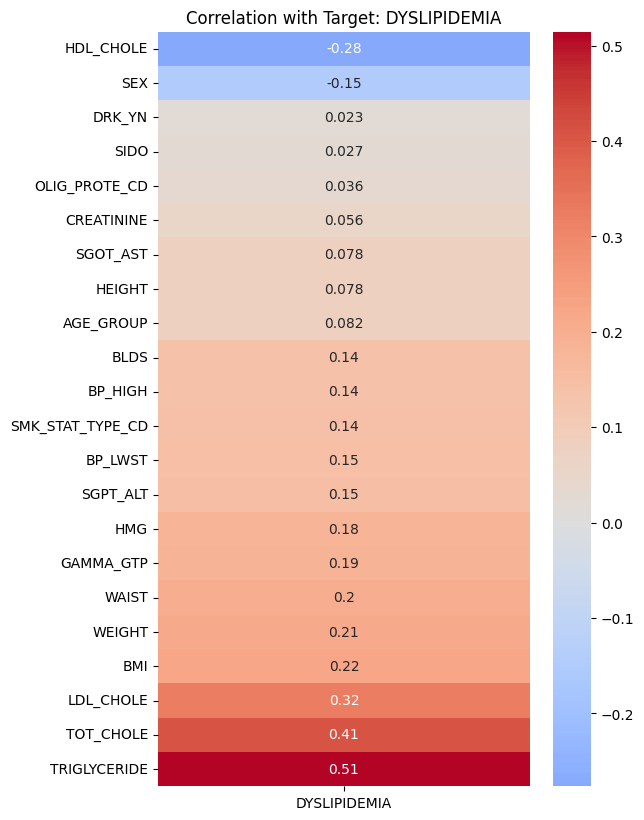

Corr - LIVER_ABNORMAL


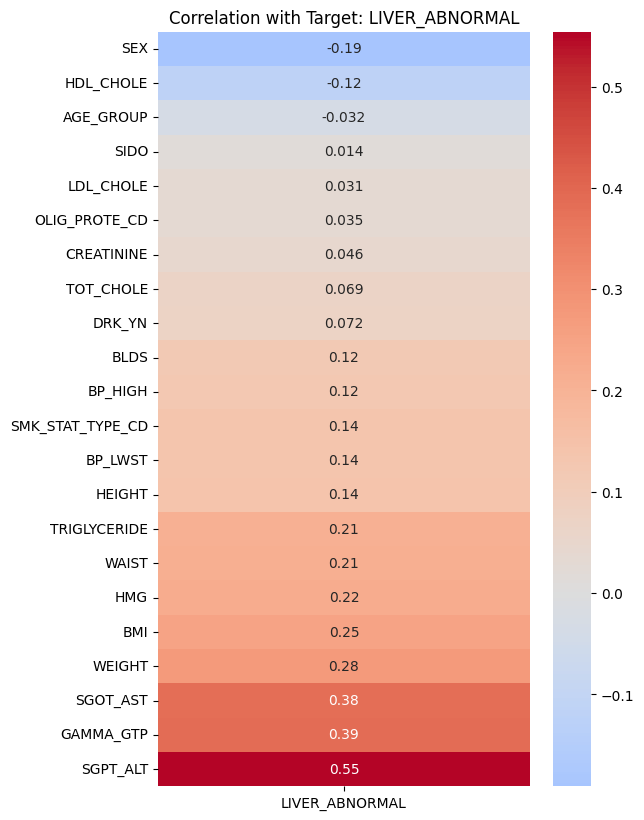

Corr - KIDNEY_ABNORMAL


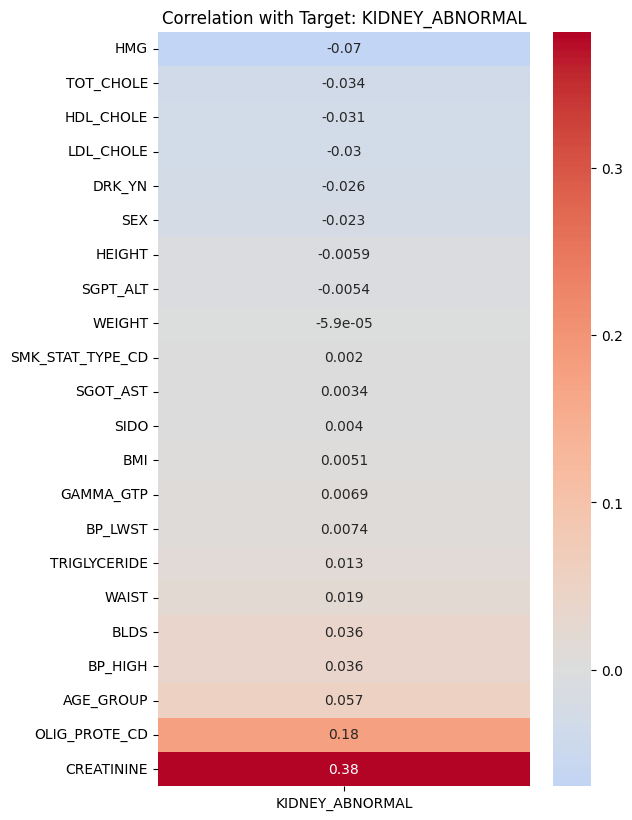

Corr - ANEMIA


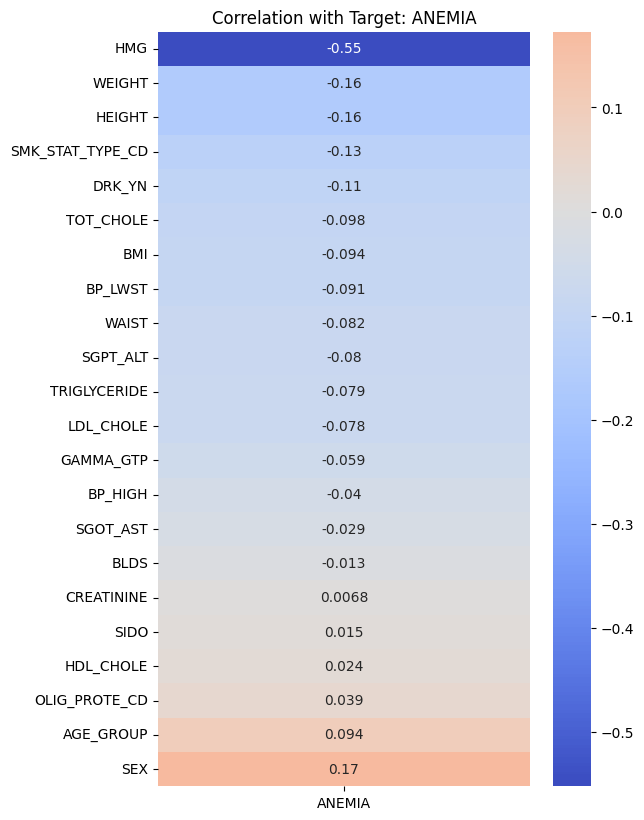

In [29]:
targets = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'DYSLIPIDEMIA',
           'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']

for target in targets:
    print(f"Corr - {target}")
    
    subset = df[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')
    
    
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    plt.figure(figsize=(6, len(corr_with_target)*0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Correlation with Target: {target}")
    plt.show()


나이,성별 x 비만

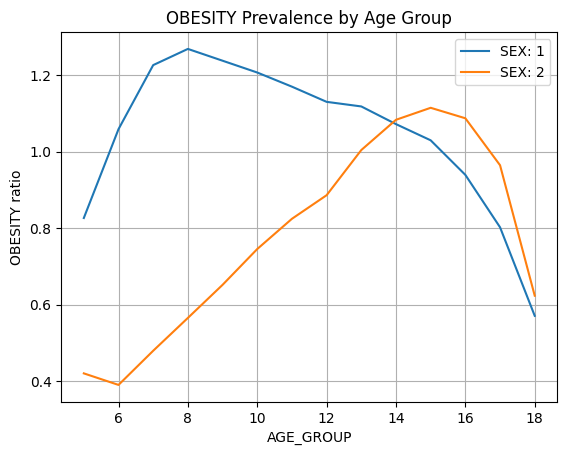

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 나이그룹, 성별, 질병 상태별 수 계산
group_stats = df.groupby(['AGE_GROUP', 'SEX'])['OBESITY'].mean().reset_index()

# 성별 구분해서 시각화
for sex in group_stats['SEX'].unique():
    sub_df = group_stats[group_stats['SEX'] == sex]
    plt.plot(sub_df['AGE_GROUP'], sub_df['OBESITY'], label=f'SEX: {sex}')

plt.xlabel('AGE_GROUP')
plt.ylabel('OBESITY ratio')
plt.title('OBESITY Prevalence by Age Group')
plt.legend()
plt.grid(True)
plt.show()


나이,성별 x 이상지지혈증

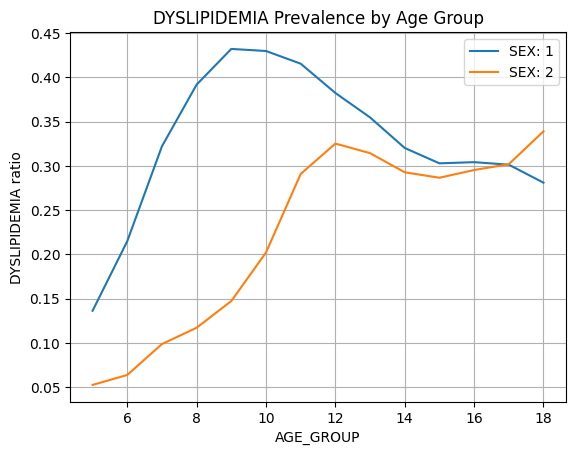

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 나이그룹, 성별, 질병 상태별 수 계산
group_stats = df.groupby(['AGE_GROUP', 'SEX'])['DYSLIPIDEMIA'].mean().reset_index()

# 성별 구분해서 시각화
for sex in group_stats['SEX'].unique():
    sub_df = group_stats[group_stats['SEX'] == sex]
    plt.plot(sub_df['AGE_GROUP'], sub_df['DYSLIPIDEMIA'], label=f'SEX: {sex}')

plt.xlabel('AGE_GROUP')
plt.ylabel('DYSLIPIDEMIA ratio')
plt.title('DYSLIPIDEMIA Prevalence by Age Group')
plt.legend()
plt.grid(True)
plt.show()


나이,성별 x 당뇨

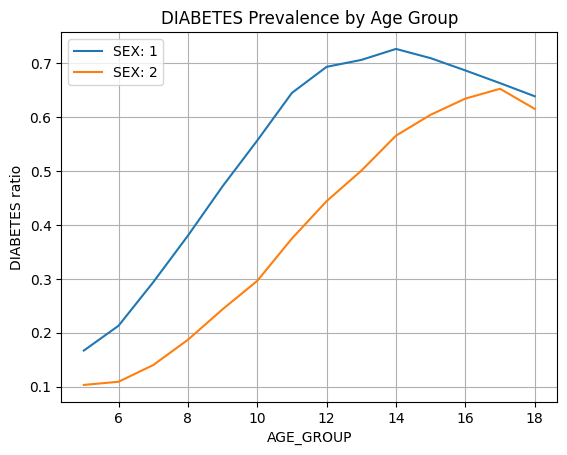

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 나이그룹, 성별, 질병 상태별 수 계산
group_stats = df.groupby(['AGE_GROUP', 'SEX'])['DIABETES'].mean().reset_index()

# 성별 구분해서 시각화
for sex in group_stats['SEX'].unique():
    sub_df = group_stats[group_stats['SEX'] == sex]
    plt.plot(sub_df['AGE_GROUP'], sub_df['DIABETES'], label=f'SEX: {sex}')

plt.xlabel('AGE_GROUP')
plt.ylabel('DIABETES ratio')
plt.title('DIABETES Prevalence by Age Group')
plt.legend()
plt.grid(True)
plt.show()


나이,성별 x 간수치 이상

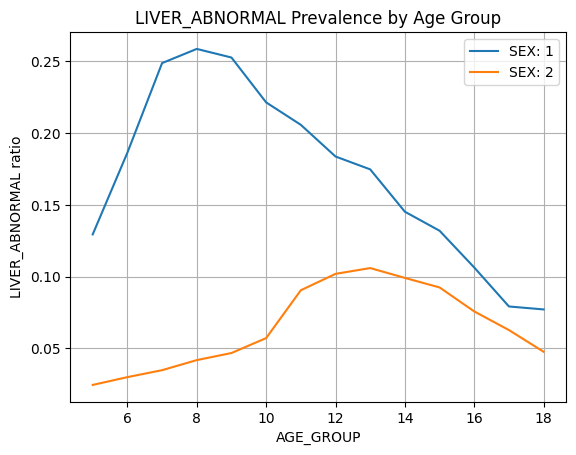

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 나이그룹, 성별, 질병 상태별 수 계산
group_stats = df.groupby(['AGE_GROUP', 'SEX'])['LIVER_ABNORMAL'].mean().reset_index()

# 성별 구분해서 시각화
for sex in group_stats['SEX'].unique():
    sub_df = group_stats[group_stats['SEX'] == sex]
    plt.plot(sub_df['AGE_GROUP'], sub_df['LIVER_ABNORMAL'], label=f'SEX: {sex}')

plt.xlabel('AGE_GROUP')
plt.ylabel('LIVER_ABNORMAL ratio')
plt.title('LIVER_ABNORMAL Prevalence by Age Group')
plt.legend()
plt.grid(True)
plt.show()


나이x성별 고혈압

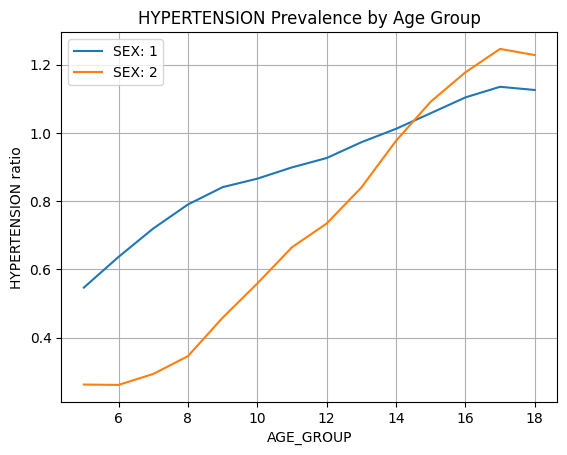

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 나이그룹, 성별, 질병 상태별 수 계산
group_stats = df.groupby(['AGE_GROUP', 'SEX'])['HYPERTENSION'].mean().reset_index()

# 성별 구분해서 시각화
for sex in group_stats['SEX'].unique():
    sub_df = group_stats[group_stats['SEX'] == sex]
    plt.plot(sub_df['AGE_GROUP'], sub_df['HYPERTENSION'], label=f'SEX: {sex}')

plt.xlabel('AGE_GROUP')
plt.ylabel('HYPERTENSION ratio')
plt.title('HYPERTENSION Prevalence by Age Group')
plt.legend()
plt.grid(True)
plt.show()

클래스별 균형 확인

In [97]:
df['OBESITY'].value_counts()

OBESITY
0    434214
2    319583
1    191410
3     41592
4      4819
Name: count, dtype: int64

In [98]:
df['DIABETES'].value_counts()

DIABETES
0    620304
1    295093
2     76221
Name: count, dtype: int64

In [99]:
df['HYPERTENSION'].value_counts()

HYPERTENSION
1    474189
0    390206
2     98791
3     28432
Name: count, dtype: int64

In [100]:
df['DYSLIPIDEMIA'].value_counts()

DYSLIPIDEMIA
0    693343
1    298275
Name: count, dtype: int64

In [101]:
df['LIVER_ABNORMAL'].value_counts()

LIVER_ABNORMAL
0    850122
1    141496
Name: count, dtype: int64

In [102]:
df['KIDNEY_ABNORMAL'].value_counts()

KIDNEY_ABNORMAL
0    988633
1      2985
Name: count, dtype: int64

In [103]:
df['ANEMIA'].value_counts()

ANEMIA
0    917652
1     73966
Name: count, dtype: int64

전처리

이상치 제거

In [38]:
df_cleaned = df[
    (df['WAIST'] < 200) &
    (df['TOT_CHOLE'] < 500) &
    (df['HDL_CHOLE'] < 200) &
    (df['LDL_CHOLE'] < 300) &
    (df['CREATININE'] < 10)
    # BMI는 굳이 안 걸러도 됨
]


In [127]:
df['OBESITY'].value_counts()

OBESITY
0    434214
2    319583
1    191410
3     41592
4      4819
Name: count, dtype: int64

In [128]:
df['DIABETES'].value_counts()

DIABETES
0    620304
1    295093
2     76221
Name: count, dtype: int64

In [129]:
df['HYPERTENSION'].value_counts()

HYPERTENSION
1    474189
0    390206
2     98791
3     28432
Name: count, dtype: int64

In [130]:
df['DYSLIPIDEMIA'].value_counts()

DYSLIPIDEMIA
0    693343
1    298275
Name: count, dtype: int64

In [131]:
df['LIVER_ABNORMAL'].value_counts()

LIVER_ABNORMAL
0    850122
1    141496
Name: count, dtype: int64

In [132]:
df['KIDNEY_ABNORMAL'].value_counts()

KIDNEY_ABNORMAL
0    988633
1      2985
Name: count, dtype: int64

In [133]:
df['ANEMIA'].value_counts()

ANEMIA
0    917652
1     73966
Name: count, dtype: int64

In [39]:
# 3. 입력 변수  정규화
import warnings
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()
df[input_features] = scaler.fit_transform(df[input_features])

모델 학습 및 평가

In [44]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# X, y 정의
X = df.drop(columns=targets + ['Year_ID', 'BLDS'])
y = df['DIABETES']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 클래스 가중치 계산
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
weight_dict = dict(zip(classes, weights))
sample_weights = y_train.map(weight_dict)

# 모델 정의 및 학습
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(classes),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train, sample_weight=sample_weights)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:50:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.79      0.59      0.68    124061
           1       0.39      0.36      0.37     59019
           2       0.21      0.68      0.32     15244

    accuracy                           0.53    198324
   macro avg       0.46      0.54      0.46    198324
weighted avg       0.63      0.53      0.56    198324



In [41]:
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# 데이터 준비
X = df.drop(columns=targets + ['Year_ID','SGPT_ALT'])
y = df["LIVER_ABNORMAL"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# y_train에서 클래스 수 세기 (0: 음성, 1: 양성)
neg, pos = np.bincount(y_train)

# 이진 분류에서 클래스 가중치 계산
scale_pos_weight = neg / pos

# 모델 학습
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)


# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94    170025
           1       0.62      0.91      0.74     28299

    accuracy                           0.91    198324
   macro avg       0.80      0.91      0.84    198324
weighted avg       0.93      0.91      0.91    198324



In [160]:
# 예시: 사용자의 현재 상태 (여기선 X_test에서 1명 선택)
user_data = X_test.iloc[[3]]  # 예시로 하나 선택

# 현재 예측: 현재 상태에서 LIVER_ABNORMAL 예측
current_pred = model.predict(user_data)[0]  # 1이면 '간 이상', 0이면 '정상'
current_prob = model.predict_proba(user_data)[0][1]  # 간 이상 확률

# 현재 상태 출력
print(f"현재 상태: {'간 이상' if current_pred == 1 else '정상'}")
print(f"간 이상 확률: {current_prob:.2%}")


현재 상태: 간 이상
간 이상 확률: 57.07%


In [162]:
# 체중을 5kg 줄인 시나리오
user_simulated = user_data.copy()  # 원본 데이터 복사
user_simulated["GAMMA_GTP"] = user_simulated["GAMMA_GTP"] - 2  

# 변경 후 예측
simulated_pred = model.predict(user_simulated)[0]
simulated_prob = model.predict_proba(user_simulated)[0][1]

# 변경 후 상태 출력
print(f"GAMMA_GT를 줄인 후: {'간 이상' if simulated_pred == 1 else '정상'}")
print(f"간 이상 확률: {simulated_prob:.2%}")


GAMMA_GT를 줄인 후: 정상
간 이상 확률: 46.22%


In [163]:
# 상태 비교 후 결과 출력
if simulated_pred != current_pred:
    status_change = "변경 후, 간 이상에서 정상으로 변경되었습니다." if simulated_pred == 0 else "변경 후, 정상에서 간 이상으로 변경되었습니다."
else:
    status_change = "변경 후, 간 이상/정상 상태는 동일합니다."

# 변화된 상태와 메시지 출력
print(f"변경 전 상태: {'간 이상' if current_pred == 1 else '정상'}, 확률: {current_prob:.2%}")
print(f"변경 후 상태: {'간 이상' if simulated_pred == 1 else '정상'}, 확률: {simulated_prob:.2%}")
print(status_change)


변경 전 상태: 간 이상, 확률: 57.07%
변경 후 상태: 정상, 확률: 46.22%
변경 후, 간 이상에서 정상으로 변경되었습니다.


In [ ]:
def find_min_change_for_normal(model, user_data, target_variable="GAMMA_GTP", threshold=0.5):
    GAMMA_GTP = user_data["GAMMA_GTP"].iloc[0]
    current_prob = model.predict_proba(user_data)[0][1]
    
    # 목표 확률 (0.5로 설정된 간 이상 위험이 50% 미만으로 떨어지도록)
    while current_prob >= threshold:
        GAMMA_GTP -= 0.5  # 체중을 조금씩 감소시킴
        user_data[target_variable] = GAMMA_GTP
        current_prob = model.predict_proba(user_data)[0][1]
    
    return GAMMA_GTP

# 최소 체중 변경값 찾기
min_GAMMA_GTP_for_normal = find_min_change_for_normal(model, user_data)
print(f"정상군으로 변하려면 최소 GAMMA_GTP {min_GAMMA_GTP_for_normal:.2f}이어야 합니다.")


정상군으로 변하려면 최소 GAMMA_GTP 1.96이어야 합니다.


C:\Users\user\AppData\Local\Temp\ipykernel_15144\2502326473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data[target_variable] = weight
C:\Users\user\AppData\Local\Temp\ipykernel_15144\2502326473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data[target_variable] = weight
C:\Users\user\AppData\Local\Temp\ipykernel_15144\2502326473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [166]:
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# 데이터 준비
X = df.drop(columns=targets + ['Year_ID','TRIGLYCERIDE'])
y = df["DYSLIPIDEMIA"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# y_train에서 클래스 수 세기 (0: 음성, 1: 양성)
neg, pos = np.bincount(y_train)

# 이진 분류에서 클래스 가중치 계산
scale_pos_weight = neg / pos

# 모델 학습
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)


# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    138669
           1       0.98      0.99      0.98     59655

    accuracy                           0.99    198324
   macro avg       0.99      0.99      0.99    198324
weighted avg       0.99      0.99      0.99    198324



In [176]:
# 예시: 사용자의 현재 상태 (여기선 X_test에서 1명 선택)
user_data = X_test.iloc[[19]]  # 예시로 하나 선택

# 현재 예측: 현재 상태에서 TRIGLYCERIDE 예측
current_pred = model.predict(user_data)[0]  # 1이면 '간 이상', 0이면 '정상'
current_prob = model.predict_proba(user_data)[0][1]  # 간 이상 확률

# 현재 상태 출력
print(f"현재 상태: {'콜레스테롤 이상' if current_pred == 1 else '정상'}")
print(f"콜레스테롤 이상 확률: {current_prob:.2%}")


현재 상태: 콜레스테롤 이상
콜레스테롤 이상 확률: 100.00%


In [179]:
# 상태 비교 후 결과 출력
if simulated_pred != current_pred:
    status_change = "변경 후, 콜레스테롤 이상에서 정상으로 변경되었습니다." if simulated_pred == 0 else "변경 후, 정상에서 콜레스테롤 이상으로 변경되었습니다."
else:
    status_change = "변경 후, 콜레스테롤 이상/정상 상태는 동일합니다."

# 변화된 상태와 메시지 출력
print(f"변경 전 상태: {'콜레스테롤간 이상' if current_pred == 1 else '정상'}, 확률: {current_prob:.2%}")
print(f"변경 후 상태: {'콜레스테롤 이상' if simulated_pred == 1 else '정상'}, 확률: {simulated_prob:.2%}")
print(status_change)


변경 전 상태: 콜레스테롤간 이상, 확률: 100.00%
변경 후 상태: 정상, 확률: 46.22%
변경 후, 콜레스테롤 이상에서 정상으로 변경되었습니다.


In [183]:
def find_min_change_for_normal(model, user_data, target_variable="TOT_CHOLE", threshold=0.5):
    TOT_CHOLE = user_data["TOT_CHOLE"].iloc[0]
    current_prob = model.predict_proba(user_data)[0][1]
    
    # 목표 확률 (0.5로 설정된 간 이상 위험이 50% 미만으로 떨어지도록)
    while current_prob >= threshold:
        TOT_CHOLE -= 10  # TOT_CHOLE 조금씩 감소시킴
        user_data[target_variable] = TOT_CHOLE
        current_prob = model.predict_proba(user_data)[0][1]
    
    return TOT_CHOLE

# 최소 체중 변경값 찾기
min_TOT_CHOLE_for_normal = find_min_change_for_normal(model, user_data)
print(f"정상군으로 변하려면 최소 TOT_CHOLE {min_TOT_CHOLE_for_normal:.2f}이어야 합니다.")


정상군으로 변하려면 최소 TOT_CHOLE -9.24이어야 합니다.


C:\Users\user\AppData\Local\Temp\ipykernel_15144\3310885737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data[target_variable] = TOT_CHOLE


In [170]:
df_dyslipidemia = df[df['DYSLIPIDEMIA'] == 1]


In [175]:
df_dyslipidemia.head()


,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,...,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
5,2017_6,0.0,0.2,0.0000,0.333333,-0.333333,-0.437956,1.157895,1.333333,0.176471,...,2.0,1.0,-0.822222,0,1,0,2,0,0,0
11,2017_12,0.0,0.8,-0.8750,-0.333333,1.000000,1.240876,-0.578947,-0.583333,2.411765,...,1.0,0.0,1.622222,3,1,2,0,1,0,0
12,2017_13,1.0,0.4,0.0000,-0.666667,-0.333333,-0.635036,0.526316,0.333333,0.588235,...,0.0,0.0,0.111111,1,1,1,1,0,0,0
14,2017_15,1.0,-0.6,0.0000,0.000000,-0.666667,-0.364964,0.473684,0.083333,-1.000000,...,0.0,0.0,-0.977778,0,1,0,1,0,0,0
19,2017_20,0.0,0.6,0.1875,0.333333,0.000000,0.291971,0.000000,0.750000,0.529412,...,2.0,1.0,-0.422222,0,1,1,1,0,0,0


In [182]:
print(user_data.columns)


Index(['SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'WAIST', 'BP_HIGH',
       'BP_LWST', 'BLDS', 'TOT_CHOLE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG',
       'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
       'SMK_STAT_TYPE_CD', 'DRK_YN', 'BMI'],
      dtype='object')
